# Importing necessary Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Load images from data set


In [2]:
data_train_path = '../Fruits_Vegetables/train'
data_test_path = "../Fruits_Vegetables/test"
data_validate_path = "../Fruits_Vegetables/validation"


setting output path and model name


In [3]:
model_output_path = "../MLModels/"
model_name = "fruits_veg_model.keras"

Initializing image width and height


In [4]:
image_width = 180
image_height = 180

# Loading Data set from Directory Path


- reads images from folders
- automatically assigns labels based on folder names
- Resizes images to initialized image width and height
- creates batches of size 32


In [5]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size = (image_width, image_height),
    batch_size = 32,
    validation_split =False
    )

Found 3115 files belonging to 36 classes.


In [6]:
data_category = data_train.class_names

Setting up validation data


In [7]:
data_validatation = tf.keras.utils.image_dataset_from_directory(
    data_validate_path,
    shuffle = True,
    image_size = (image_width, image_height),
    batch_size = 32,
    validation_split =False
    )

Found 351 files belonging to 36 classes.


setting up test data


In [8]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle = True,
    image_size = (image_width, image_height),
    batch_size = 32,
    validation_split =False
    )

Found 359 files belonging to 36 classes.


Plotting images from data set


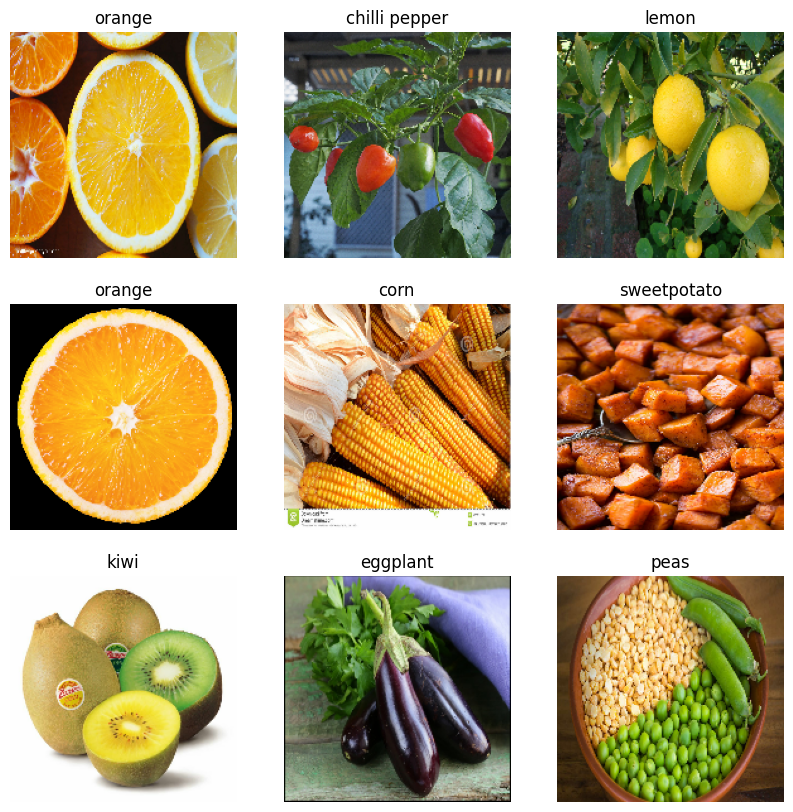

In [9]:
plt.figure(figsize= (10,10))
for image,labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_category[labels[i]])
        plt.axis('off')

## Building a CNN Model


- Conv layers extract image features
- polling layers reduce size
- flatten converts to vector
- dense layers perform classification
- Dropout prevents overfitting


In [10]:
model = Sequential([
    layers.Rescaling(1/255),
    layers.Conv2D(16,3,padding='same',activation= 'relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(units=len(data_category))
    ])

# Compiling the Model


In [11]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
    )

- model.fit() → this is the training step where the CNN actually learns patterns from your training images. Without this, your model is just an untrained network — it cannot classify anything.

- data_train → your training images are passed here so the model can learn features of fruits/vegetables.

- validation_data=data_validatation → used to evaluate model performance after each epoch. Helps detect overfitting.

- epochs=epochs_size → number of full passes over your training dataset.

- More epochs → better learning, but too many → overfitting.

- batch_size=32 → number of images processed together in one step. Helps optimize memory usage.

- verbose=1 → shows the progress of training in the console.

- history → stores training metrics (accuracy & loss) for plotting and analysis.


In [12]:
epochs_size = 25
history = model.fit(
    data_train,
    validation_data=data_validatation,
    epochs=epochs_size,
    batch_size=32,
    verbose=1
    )

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 168ms/step - accuracy: 0.0822 - loss: 3.5965 - val_accuracy: 0.2792 - val_loss: 2.6770
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 169ms/step - accuracy: 0.2815 - loss: 2.5740 - val_accuracy: 0.5242 - val_loss: 1.7975
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 170ms/step - accuracy: 0.4462 - loss: 1.9471 - val_accuracy: 0.7379 - val_loss: 1.0636
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 174ms/step - accuracy: 0.6475 - loss: 1.2383 - val_accuracy: 0.8519 - val_loss: 0.5561
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 173ms/step - accuracy: 0.8016 - loss: 0.6975 - val_accuracy: 0.8547 - val_loss: 0.5893
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 177ms/step - accuracy: 0.8867 - loss: 0.4109 - val_accuracy: 0.9373 - val_loss: 0.4236
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 180ms/step - accuracy: 0.9303 - loss: 0.2736 - val_accuracy: 0.9345 - val_loss: 0.3941
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 185ms/step - accuracy: 0.9477 - loss: 0.2262 - val_accu

Plotting Accuracy and Val Accuracy


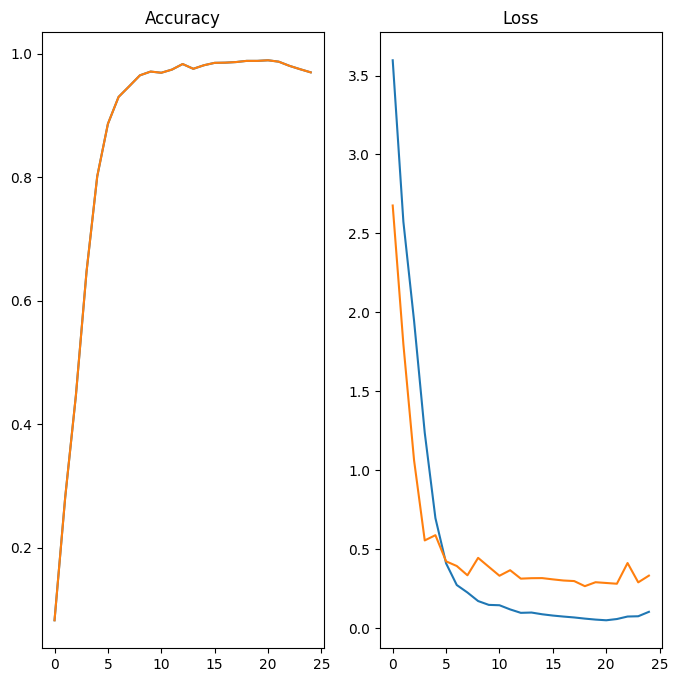

In [13]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label='TrainingAccuracy')
plt.plot(epochs_range,history.history['accuracy'],label='ValidationAccuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Trainingloss')
plt.plot(epochs_range,history.history['val_loss'],label='Validation loss')
plt.title('Loss')
plt.show()

## saving the model


In [14]:
model.save(model_output_path+model_name)

## Predicting a New Image


In [15]:
image = "hello.jpg"
image = tf.keras.utils.load_img(image,target_size=(image_height,image_width))
image_arr = tf.keras.utils.array_to_img(image)
image_bat = tf.expand_dims(image_arr,0)

In [16]:
predict = model.predict(image_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


In [17]:
score = tf.nn.softmax(predict)

In [18]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(
    data_category[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is beetroot with accuracy of 76.82
